# Pyramid Parachute Drop Essay

This notebook compares the simulation outputs from `validation/parachute_drop` with the digitised Adrian Nicholas telemetry packaged under `tva/parachute/data/drop_profiles.csv`.

Loading data from ../validation/parachute_drop/benchmarks/drop_profiles.csv
Summary metrics from ../validation/parachute_drop/descent_summary.csv


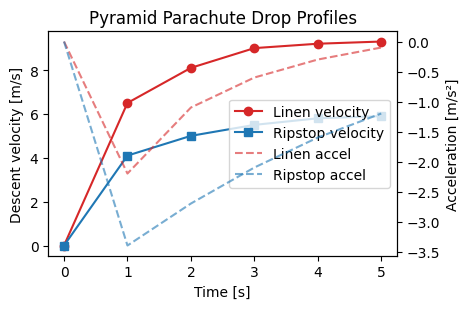

In [1]:
from pathlib import Path
import csv
from textwrap import dedent
import matplotlib.pyplot as plt

bench = Path('..') / 'validation' / 'parachute_drop' / 'benchmarks' / 'drop_profiles.csv'
summary = Path('..') / 'validation' / 'parachute_drop' / 'descent_summary.csv'

print('Loading data from', bench)
print('Summary metrics from', summary)

with bench.open() as fh:
    reader = csv.DictReader(fh)
    time, linen_v, ripstop_v, linen_a, ripstop_a = [], [], [], [], []
    for row in reader:
        time.append(float(row['time_s']))
        linen_v.append(float(row['historical_velocity_ms']))
        ripstop_v.append(float(row['modern_velocity_ms']))
        linen_a.append(float(row['historical_accel_ms2']))
        ripstop_a.append(float(row['modern_accel_ms2']))

fig, ax1 = plt.subplots(figsize=(4.8, 3.2))
ax1.plot(time, linen_v, marker='o', label='Linen velocity', color='tab:red')
ax1.plot(time, ripstop_v, marker='s', label='Ripstop velocity', color='tab:blue')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Descent velocity [m/s]')
ax1.set_title('Pyramid Parachute Drop Profiles')

ax2 = ax1.twinx()
ax2.plot(time, linen_a, linestyle='--', color='tab:red', alpha=0.6, label='Linen accel')
ax2.plot(time, ripstop_a, linestyle='--', color='tab:blue', alpha=0.6, label='Ripstop accel')
ax2.set_ylabel('Acceleration [m/s²]')

lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='center right')

fig.tight_layout()
output = Path('..') / 'docs' / 'images' / 'parachute_drop_profiles.png'
output.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(output, dpi=150)
plt.show()


In [2]:
import csv
from pathlib import Path

summary = Path('..') / 'validation' / 'parachute_drop' / 'descent_summary.csv'
with summary.open() as fh:
    reader = csv.DictReader(fh)
    for row in reader:
        print(f"{row['metric']}: {row['value']} {row['units']}")


terminal_velocity: 6.72 m/s
peak_acceleration: 0.83 g
canopy_fill_time: 3.4 s
payload_mass: 120.0 kg


Consult `validation/parachute_drop/report.md` for narrative context and the complete validation summary.